# Ejercicios ensembling
En este ejercicio vas a realizar prediciones sobre un dataset de ciudadanos indios diabéticos. Se trata de un problema de clasificación en el que intentaremos predecir 1 (diabético) 0 (no diabético). Todas las variables son numércias.

### 1. Carga las librerias que consideres comunes al notebook

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 2. Lee los datos de [esta direccion](https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv)
Los nombres de columnas son:
```Python
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
```

In [2]:
diabetes_data = pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv",header=None)
diabetes_data.columns = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
diabetes_data

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [29]:
diabetes_data.loc[:,"preg"].value_counts()

preg
1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
17      1
15      1
Name: count, dtype: int64

In [37]:
diabetes_data.loc[:,"class"].value_counts(normalize=True)

class
0    0.651042
1    0.348958
Name: proportion, dtype: float64

In [ ]:
# Ejemplo

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [30]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   preg    768 non-null    int64  
 1   plas    768 non-null    int64  
 2   pres    768 non-null    int64  
 3   skin    768 non-null    int64  
 4   test    768 non-null    int64  
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    int64  
 8   class   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   preg    768 non-null    int64  
 1   plas    768 non-null    int64  
 2   pres    768 non-null    int64  
 3   skin    768 non-null    int64  
 4   test    768 non-null    int64  
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    int64  
 8   class   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [11]:
diabetes_data.describe()

,preg,plas,pres,skin,test,mass,pedi,age,class
count,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000
mean,3.842243,120.859192,69.101695,20.517601,79.903520,31.990482,0.471674,33.219035,0.348110
std,3.370877,31.978468,19.368155,15.954059,115.283105,7.889091,0.331497,11.752296,0.476682
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243500,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,32.000000,32.000000,0.371000,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,127.500000,36.600000,0.625000,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


,preg,plas,pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<Axes: >

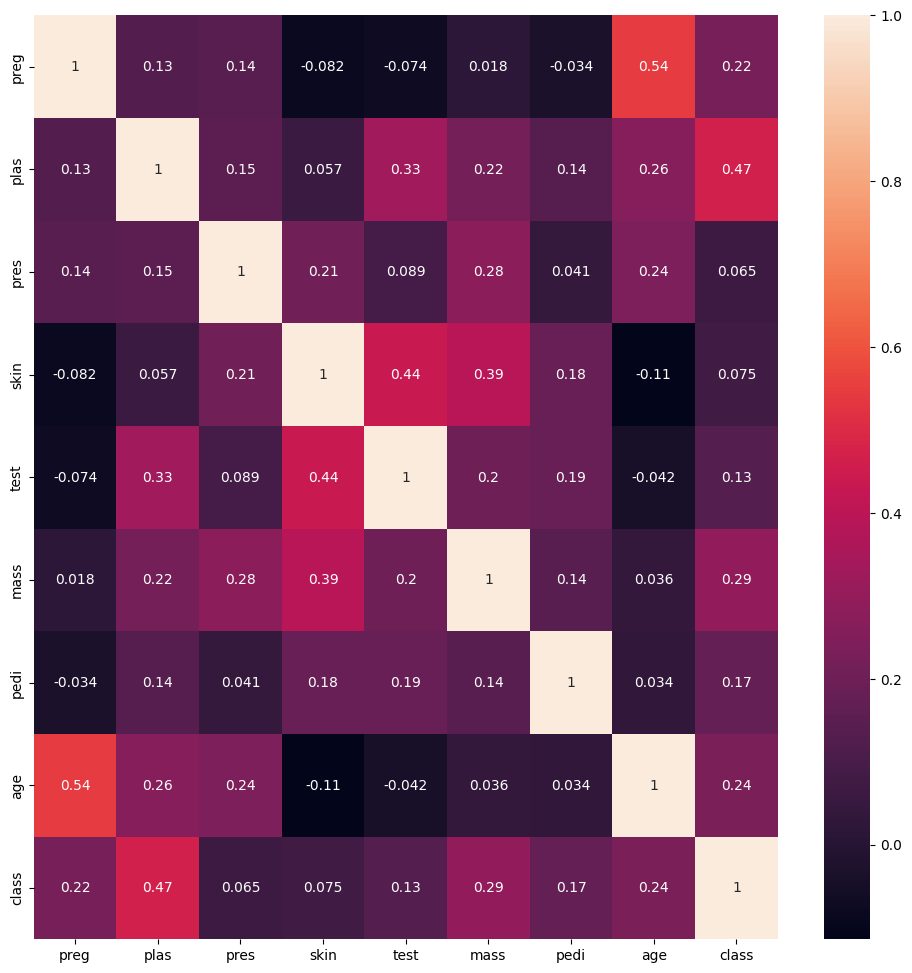

In [31]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 12))
sns.heatmap(diabetes_data.corr(),annot=True)

<AxesSubplot:>

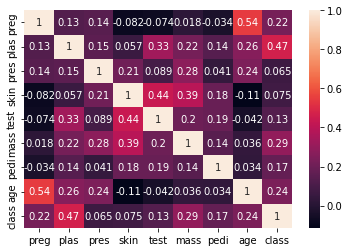

### 3. Bagging
Para este apartado tendrás que crear un ensemble utilizando la técnica de bagging ([BaggingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html)), mediante la cual combinarás 100 [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html). Recuerda utilizar también [cross validation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html) con 10 kfolds.

**Para este apartado y siguientes, no hace falta que dividas en train/test**, por hacerlo más sencillo. Simplemente divide tus datos en features y target.

Establece una semilla

In [3]:
# Separa los datos en features (X) y target (y)
# Nuestro target es df["class"]
# Muestra el shape de ambos conjuntos

X = diabetes_data.iloc[:,:8]
y = diabetes_data.loc[:,"class"]

(768, 8)
(768,)


In [4]:
print(X.shape)
print(y.shape)

(768, 8)
(768,)


In [ ]:
# Vamos a grabar la semilla 7 para todos los modelos en la variable seed

In [6]:
seed = 7

In [7]:
from sklearn.model_selection import KFold, cross_val_score

In [8]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, cross_val_score
# Instancia un Decision Tree Classifier
estimator = DecisionTreeClassifier(max_depth=3,random_state=seed,class_weight="balanced")
# Instancia un Bagging Classifier cuyo base estimator sea el DecisionTreeClassifier() , el número de estimadores sea 100 y el random state sea la semilla seed que hemos creado
bag_clf = BaggingClassifier(
    estimator = estimator,
    n_estimators=100, # Cantidad de árboles
    max_samples=0.8, # Muestras utilizadas en boostrapping
    bootstrap=True, # Usamos boostrapping
    max_features = 3, # Features que utiliza en el boostrapping. Cuanto más bajo, mejor generalizará y menos overfitting
    random_state = seed,
    n_jobs=-1)

# Instancia 10 KFolds en la variable kfold
kfold = KFold(n_splits = 10)

# Cálcula el cross validation score del Bagging Classifier con X e y, el cv sea igual a kfold y el scoring sea 'accuracy'
# scores = cross_val_score(logisticRegr, X_train, y_train, cv=kfold, scoring='accuracy')
scores_bag_clf = cross_val_score(bag_clf, X, y, cv=kfold, scoring='accuracy',n_jobs=-1)
# Recuerda que el cross validation score se graba en una nueva variable, dale un nombre adecuado y no la borres, la necesitarás al final del ejercicio

In [9]:
# Obtén la media del cross validation score para el Bagging Classifier
print("Promedio de accuracy:", scores_bag_clf.mean())
# Simplemente en la variable en la que guardaste el CV usa el método < .mean() >

Promedio de accuracy: 0.7369617224880383


In [11]:
scores_bag_clf

array([0.71428571, 0.74025974, 0.74025974, 0.62337662, 0.71428571,
       0.76623377, 0.79220779, 0.81818182, 0.73684211, 0.72368421])

0.7720437457279563

### 4. Random Forest
En este caso entrena un [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) con 100 árboles y un `max_features` de 3. También con validación cruzada

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error

In [15]:
# Instancia un Random Forest Classifier con 100 árboles, max features de 3 y que el random state sea la seed que hemos creado
rnd_clf = RandomForestClassifier(n_estimators=200,
                                 max_features=3,
                                 max_leaf_nodes=16,
                                 random_state=seed)

# Cálcula el cross validation score del Random Forest Classifier con X e y, y que el cv sea igual a kfold
scores_rnd_clf = cross_val_score(rnd_clf, X, y, cv=kfold, scoring='accuracy')

# Recuerda que el cross validation score se graba en una nueva variable, dale un nombre adecuado y no la borres, la necesitarás al final del ejercicio

In [16]:
# Obtén la media del cross validation score para el Random Forest Classifier
print("Promedio de accuracy:", scores_rnd_clf.mean())

Promedio de accuracy: 0.770762132604238


In [ ]:
# Obtén la media del cross validation score para el Random Forest Classifier

0.7733766233766234

### 5. AdaBoost
Implementa un [AdaBoostClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html) con 30 árboles.

In [18]:
from sklearn.ensemble import AdaBoostClassifier

In [20]:
# Instancia un AdaBoost Classifier con 30 árboles y que el random state sea la seed que hemos creado
estimator_adaboost = DecisionTreeClassifier(max_depth=3,random_state=seed)

ada_clf = AdaBoostClassifier(estimator = estimator_adaboost,
                             n_estimators=30,
                             learning_rate=0.01,
                             random_state=seed)

# Cálcula el cross validation score del AdaBoost Classifier con X e y, y que el cv sea igual a kfold
scores_ada_clf = cross_val_score(ada_clf, X, y, cv=kfold, scoring='accuracy')

# Recuerda que el cross validation score se graba en una nueva variable, dale un nombre adecuado y no la borres, la necesitarás al final del ejercicio

c:\Users\Usuario\miniconda3\envs\data_analysis_env\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Usuario\miniconda3\envs\data_analysis_env\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Usuario\miniconda3\envs\data_analysis_env\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Usuario\miniconda3\envs\data_analysis_env\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and w

In [21]:
# Obtén la media del cross validation score para el AdaBoost Classifier
print("Promedio de accuracy:", scores_ada_clf.mean())

Promedio de accuracy: 0.7485304169514697


0.760457963089542

### 6. GradientBoosting
Implementa un [GradientBoostingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html) con 100 estimadores

In [23]:
from sklearn.ensemble import GradientBoostingClassifier

In [24]:
# Instancia un GradientBoosting Classifier con 100 estimadores y que el random state sea la seed que hemos creado

gbct = GradientBoostingClassifier(max_depth=3,random_state=seed,n_estimators=100)

# Cálcula el cross validation score del GradientBoosting Classifier con X e y, y que el cv sea igual a kfold
scores_gbct = cross_val_score(gbct, X, y, cv=kfold, scoring='accuracy')

# Recuerda que el cross validation score se graba en una nueva variable, dale un nombre adecuado y no la borres, la necesitarás al final del ejercicio

In [25]:
# La misma vaina que estamos haciendo, saca el mean() de la variable del cross_validation
print("Promedio de accuracy:", scores_gbct.mean())

Promedio de accuracy: 0.7681989063568012


In [ ]:
# La misma vaina que estamos haciendo, saca el mean() de la variable del cross_validation

0.7681989063568012

### 7. XGBoost
Para este apartado utiliza un [XGBoostClassifier](https://docs.getml.com/latest/api/getml.predictors.XGBoostClassifier.html) con 100 estimadores. XGBoost no forma parte de la suite de modelos de sklearn, por lo que tendrás que instalarlo con pip install

In [ ]:
# Descomenta la siguiente wea (palabra chilena, no es ningun termino de Machine Learning) para instalar el XGBoost

In [73]:
!pip install xgboost

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.5/124.9 MB 2.1 MB/s eta 0:01:00
   ---------------------------------------- 1.0/124.9 MB 2.8 MB/s eta 0:00:45
    --------------------------------------- 1.8/124.9 MB 2.8 MB/s eta 0:00:45
    --------------------------------------- 2.4/124.9 MB 2.7 MB/s eta 0:00:45
    --------------------------------------- 2.9/124.9 MB 2.7 MB/s eta 0:00:46
   - -------------------------------------- 3.1/124.9 MB 2.4 MB/s eta 0:00:51
   - -------------------------------------- 3.1/124.9 MB 2.4 MB/s eta 0:00:51
   - -------------------------------------- 3.4/124.9 MB 1.9 MB/s eta 0:01:04
   - -------------------------------------- 3.4/124.9 MB 1.9 MB/s eta 0:01:04
   - -------------------------------------- 3.7/124.9 MB 1.7 MB/s eta 0:01:14
   - -------------------------------------- 3.7/124.9 MB 1.7 MB/s eta 0:01:14
   - -------------------------------------- 3.9/124.9 MB 1.5 MB/s eta 0

In [26]:
from xgboost import XGBClassifier

In [27]:
# Instancia un XGBoost Classifier con 100 estimadores y que el random state sea la seed que hemos creado
xgb_reg = XGBClassifier(
    random_state=seed,   # Semilla para reproducibilidad
    n_estimators=100     # Número de árboles a construir
)



# Cálcula el cross validation score del XGBoost Classifier con X e y, y que el cv sea igual a kfold
scores_xgb_reg = cross_val_score(xgb_reg, X, y, cv=kfold, scoring='accuracy')

# Recuerda que el cross validation score se graba en una nueva variable, dale un nombre adecuado y no la borres, la necesitarás al final del ejercicio

In [28]:
# la mean de la wea que acabamos de hacer
print("Promedio de accuracy:", scores_xgb_reg.mean())

Promedio de accuracy: 0.7421736158578265


0.7395591250854407

### 8. Resultados
Crea un series con los resultados y sus algoritmos, ordenándolos de mayor a menor

In [29]:
result = [scores_bag_clf.mean(), scores_rnd_clf.mean(), scores_ada_clf.mean(), scores_gbct.mean(), scores_xgb_reg.mean()]
models = ['Bagging DT', "Random Forest", "Ada Boost", "GradientBoosting", "XGBoost"]

resultados = pd.Series(result, models).sort_values(ascending=False)
resultados

Random Forest       0.770762
GradientBoosting    0.768199
Ada Boost           0.748530
XGBoost             0.742174
Bagging DT          0.736962
dtype: float64

In [ ]:
result = [scores_bag_clf.mean(), scores_rnd_clf.mean(), scores_ada_clf.mean(), scores_gbct.mean(), scores_xgb_reg.mean()]
models = ['Bagging DT', "Random Forest", "Ada Boost", "GradientBoosting", "XGBoost"]

resultados = pd.Series(result, models).sort_values(ascending=False)
resultados

Random Forest       0.773377
Bagging DT          0.772044
GradientBoosting    0.768199
Ada Boost           0.760458
XGBoost             0.739559
dtype: float64

In [ ]:
# Si quieres seguir diviertiendote puedes hacer lo siguiente:

# Continue with:
# split train test
# .fit
# evaluation with test